In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [56]:
data=pd.read_csv("news_full.csv")
len(data)

11138

# TF-IDF with Kmeans
Based on this article: https://www.kaggle.com/jbencina/clustering-documents-with-tfidf-and-kmeans

In [3]:
text=df['Content']

In [62]:
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 8000,
    stop_words = 'english'
)
tfidf.fit(data["Content"])
text = tfidf.transform(data['Content'])

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


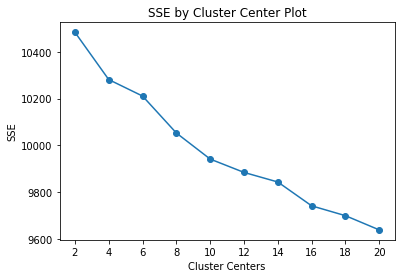

In [44]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(text, 20)

In [45]:
clusters = MiniBatchKMeans(n_clusters=16, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)

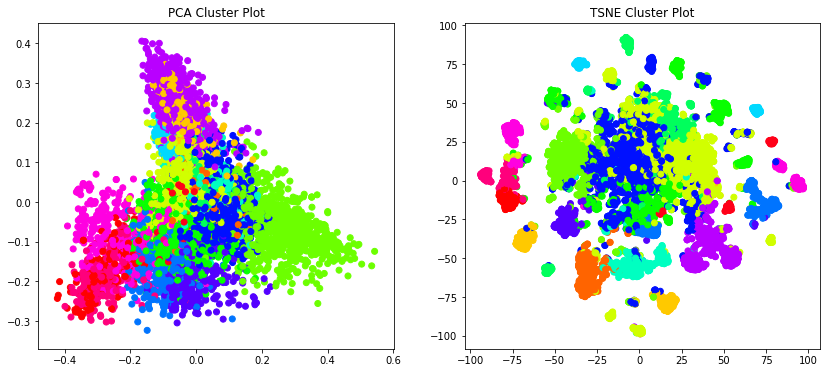

In [57]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=11138, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=11138, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(text, clusters)

In [59]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(text, clusters, tfidf.get_feature_names(), 10)


Cluster 0
police,said,schaerbeek,paris,bakraoui,belgium,attacks,airport,belgian,brussels

Cluster 1
club,florida,omar,said,shooting,pulse,gay,nightclub,orlando,mateen

Cluster 2
officer,said,emanuel,shooting,mcdonald,video,scott,police,charlotte,chicago

Cluster 3
new,officers,rahami,according,man,woman,told,women,police,said

Cluster 4
election,obama,republican,hillary,president,donald,campaign,said,clinton,trump

Cluster 5
isis,people,germany,islamic,security,jakarta,attacks,police,attack,said

Cluster 6
sentence,federal,prosecutors,trial,sexual,case,judge,said,court,cosby

Cluster 7
people,malik,said,shooting,mass,san,bernardino,farook,guns,gun

Cluster 8
acevedo,suspect,manley,haruka,campus,texas,police,criner,weiser,austin

Cluster 9
islamic,said,airport,iraqi,istanbul,mosul,kurdish,pkk,turkish,turkey

Cluster 10
just,president,police,trump,new,like,drug,says,people,said

Cluster 11
regime,chemical,government,said,aleppo,russian,assad,russia,syria,syrian

Cluster 12
johnson,said,

# TF-IDF with DBSCAN

In [69]:
from sklearn.cluster import DBSCAN

In [80]:
db = DBSCAN(eps=0.3, min_samples=10).fit(text) 
core_samples_mask = np.zeros_like(db.labels_) 
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_ 

In [81]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) 


In [82]:
print(labels)

[-1 -1 -1 ... -1 -1 -1]


['y', 'b', 'g', 'r']


ValueError: setting an array element with a sequence.

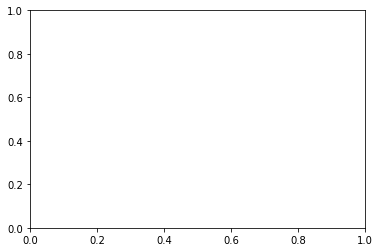

In [79]:
unique_labels = set(labels) 
colors = ['y', 'b', 'g', 'r'] 
print(colors) 
for k, col in zip(unique_labels, colors): 
    if k == -1: 
        # Black used for noise. 
        col = 'k'
  
    class_member_mask = (labels == k) 
  
    xy = text[class_member_mask & core_samples_mask] 
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, 
                                      markeredgecolor='k',  
                                      markersize=6) 
  
    xy = X[class_member_mask & ~core_samples_mask] 
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, 
                                      markeredgecolor='k', 
                                      markersize=6) 
  
plt.title('number of clusters: %d' %n_clusters_) 
plt.show() 